# C. Explore forcing data of SUMMA 3.0.0

The list of forcing files file is an **`ASCII file`** that specifies a list of meteorological forcing files that are read by SUMMA and that provide the time-varying atmospheric boundary conditions. The list of forcing files file contains one field per line, which specifies the name of a forcing file in single quotes. The file is parsed by **`build/source/engine/ffile_info.f90:ffile_info()`**. Each of the forcing files must contain all the GRUs/HRUs that are part of the simulation, but can contain a subset of the modeling period. For example, the forcing files can be organized by year or month to stop file sizes for large domains from becoming too unwieldy. In the forcing files, these meteorological forcing files would be listed in order, with the earliest file listed first.

The meteorological forcing files are **NetCDF** files that specify the time-varying atmospheric boundary conditions for SUMMA. The files are parsed by **`build/source/engine/ffile_info.f90:ffile_info()`** to perform a series of file checks (number of HRUs, presence of all required variables) and by **`build/source/engine/read_force.f90:read_force()`** to get the meteorological information for the next time step.

Each forcing file must contain a **`time`** and a **`hru`** dimension. In addition, the file must contain the following variables at a minimum (it is OK if the file contains additional variables that will not be read, for example, it may be useful include latitude and longitude for each HRU to facilitate visualization of the forcing data)

|Variable  |	dimension  |	type  |	units    |	long name  |	notes|
|:----------|:---------------|:----------|:----------|:-------------|:-------------------|
|data_step |-	           |double    |seconds	 |Length of time step|	Single value that must be the same for all forcing files in the same list of forcing files file|
|hruId|	hru	|int or int64|	-	|Index of hydrological response unit (HRU)	|Unique numeric ID for each HRU|
|time	|time	|double	|see below|	time since time reference|	Time stamps are period-ending|
|pptrate	|time, hru	|double|	kg m-2 s-1|	Precipitation rate	|
|SWRadAtm	|time, hru	|double|	W m-2|	Downward shortwave radiation at the upper boundary|	
|LWRadAtm	|time, hru	|double|	W m-2|	Downward longwave radiation at the upper boundary
|airtemp	|time, hru	|double|	K|	Air temperature at the measurement height|	
|windspd	|time, hru	|double|	m s-1|	Wind speed at the measurement height|	
|airpres	|time, hru	|double|	Pa|	Air pressure at the the measurement height|	
|spechum	|time, hru	|double|	g g-1|	Specific humidity at the measurement height|	

Notes about forcing file format:

* **`Forcing timestep units`**: The user can specify the time units as **`<units> since <reference time>`**, where **`<units>`** is one of **`seconds`**, **`hours`**, or **`days`** and **`<reference time>`** is specified as **`YYYY-MM-DD hh:mm`**.

* **`Forcing time stamp`**: SUMMA forcing time stamps are period-ending and the forcing information reflects average conditions over the time interval of length **`data_step`** preceding the time stamp.

* **`Upper boundary`**: The upper boundary refers to the upper boundary of the SUMMA domain, so this would be at some height above the canopy or ground (in case there is no canopy).

* **`Measurement height`**: The measurement height is the height (above bare ground) where the meteorological variables are specified. This value is specified as **`mHeight`** in the local attributes file.

SUMMA uses adaptive time stepping to solve the model equations. Atmospheric conditions are kept constant during the adaptive sub-steps that occur during a meteorological forcing time step.

## 1. Import pySUMMA 3.0.0

In [1]:
import pysumma as ps

## 2. Create Simulatioin Object

In [2]:
executable = "/usr/bin/summa.exe"
file_manager = 'SummaModel_ReynoldsAspenStand_StomatalResistance/settings/summa_fileManager_riparianAspenSimpleResistance.txt'

s = ps.Simulation(executable, file_manager)

## 3. Explore forcing file list file

### 3.1 Show forcing file list using `forcing_paths` attributte

In [3]:
s.force_file_list.forcing_paths

['/home/jovyan/work/SUMMA3_Manual/SummaModel_ReynoldsAspenStand_StomatalResistance/data/forcingData/forcing_above_aspen.nc']

### 3.2 Show forcing file list using `original_contents` attributte

In [4]:
s.force_file_list.original_contents

["'forcing_above_aspen.nc'\n"]

### 3.3 Show forcing file list using `file_name` attributte

In [5]:
s.force_file_list.file_name

PosixPath('summa_zForcingFileList_riparianAspen.txt')

### 3.4 Open forcing file using `open_forcing_data` attributte

In [6]:
forcing = s.force_file_list.open_forcing_data()
forcing

[<xarray.Dataset>
 Dimensions:    (hru: 1, time: 87672)
 Coordinates:
   * time       (time) datetime64[ns] 1998-10-01T00:59:59.999996640 ... 2008-1...
 Dimensions without coordinates: hru
 Data variables:
     hruId      (hru) int32 ...
     latitude   (hru) float64 ...
     longitude  (hru) float64 ...
     data_step  timedelta64[ns] ...
     LWRadAtm   (time, hru) float64 ...
     SWRadAtm   (time, hru) float64 ...
     airpres    (time, hru) float64 ...
     airtemp    (time, hru) float64 ...
     pptrate    (time, hru) float64 ...
     spechum    (time, hru) float64 ...
     windspd    (time, hru) float64 ...
 Attributes:
     dataset_orig_path:  /d2/anewman/summa/summaTestCases/testCases_data/input...
     history:            Tue Sep 27 21:53:08 2016: ncrename -d nHRU,hru ./inpu...
     NCO:                "4.6.0"]

### 3.5 Change forcing file name to "cues_2011-2017.nc" in forcing file list text file

In [7]:
import os
with open(os.path.abspath(s.force_file_list.original_path / s.force_file_list.file_name),'r') as file:
    filedata = file.read()
    filedata = filedata.replace(s.force_file_list.forcing_paths[0].split("/")[-1], 'cues_2011-2017.nc')
with open(os.path.abspath(s.force_file_list.original_path / s.force_file_list.file_name),'w') as file:
    file.write(filedata)

In [8]:
# check the changed forcing file name
s = ps.Simulation(executable, file_manager)
s.force_file_list.original_contents

["'cues_2011-2017.nc'\n"]

### 3.6 Return previous forcing file name back in forcing file list text file

In [9]:
with open(os.path.abspath(s.force_file_list.original_path / s.force_file_list.file_name),'r') as file:
    filedata = file.read()
    filedata = filedata.replace(s.force_file_list.forcing_paths[0].split("/")[-1], 'forcing_above_aspen.nc')
with open(os.path.abspath(s.force_file_list.original_path / s.force_file_list.file_name),'w') as file:
    file.write(filedata)

In [10]:
# check the changed forcing file name
s = ps.Simulation(executable, file_manager)
s.force_file_list.original_contents

["'forcing_above_aspen.nc'\n"]

### 3.7 Get forcing data and visualization

In [11]:
from pysumma.plotting.plotting import Plotting

In [12]:
# create a pySUMMA plotting object using the SUMMA output NetCDF file 
P = Plotting(s.force_file_list.forcing_paths[0])

In [13]:
# show forcing Dimensions, Coordinates and Data variables in netCDF
P.open_netcdf()

<xarray.Dataset>
Dimensions:    (hru: 1, time: 87672)
Coordinates:
  * time       (time) datetime64[ns] 1998-10-01T00:59:59.999996640 ... 2008-1...
Dimensions without coordinates: hru
Data variables:
    hruId      (hru) int32 ...
    latitude   (hru) float64 ...
    longitude  (hru) float64 ...
    data_step  timedelta64[ns] ...
    LWRadAtm   (time, hru) float64 ...
    SWRadAtm   (time, hru) float64 ...
    airpres    (time, hru) float64 ...
    airtemp    (time, hru) float64 ...
    pptrate    (time, hru) float64 ...
    spechum    (time, hru) float64 ...
    windspd    (time, hru) float64 ...
Attributes:
    dataset_orig_path:  /d2/anewman/summa/summaTestCases/testCases_data/input...
    history:            Tue Sep 27 21:53:08 2016: ncrename -d nHRU,hru ./inpu...
    NCO:                "4.6.0"

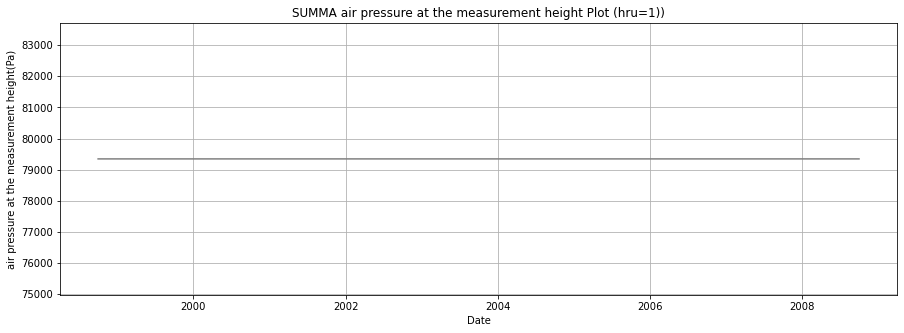

In [14]:
# timeseries plot with air pressure variable and hru 1
P.ts_plot('airpres', hru_num = 0)

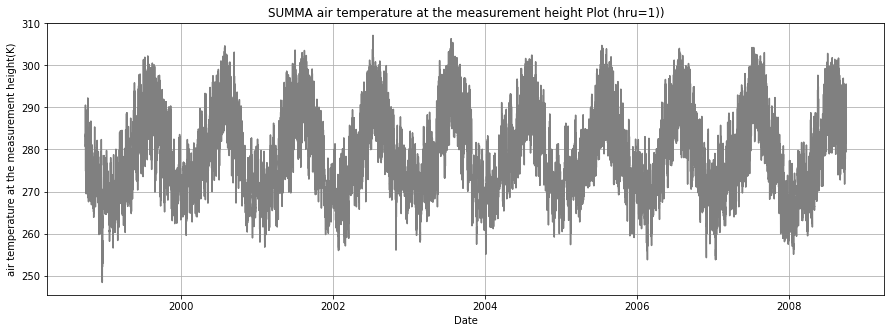

In [15]:
# timeseries plot with air temperature variable and hru 1
P.ts_plot('airtemp', hru_num = 0)

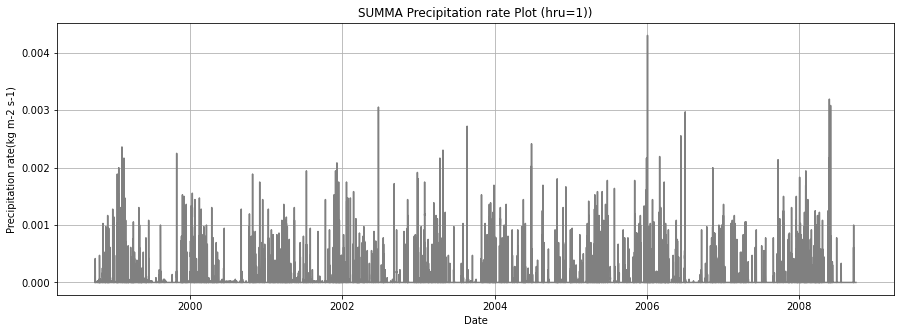

In [16]:
# timeseries plot with precipitaiton variable and hru 1
P.ts_plot('pptrate', hru_num = 0)

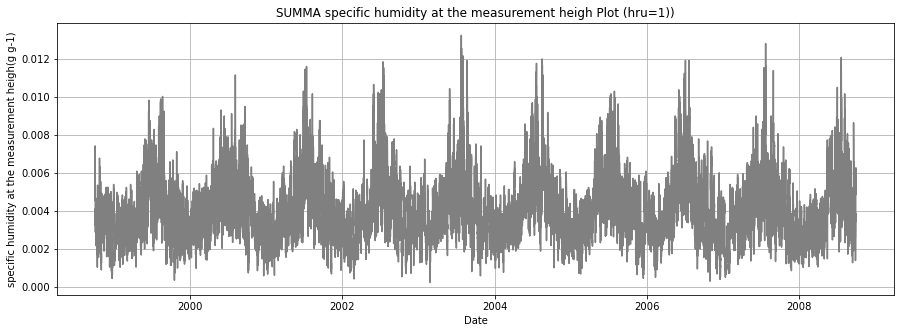

In [17]:
# timeseries plot with Specific humidity variable and hru 1
P.ts_plot('spechum', hru_num = 0)

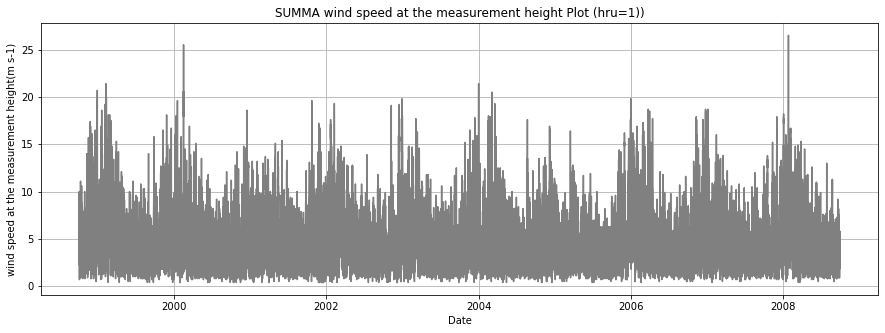

In [18]:
# timeseries plot with wind speed variable and hru 1
P.ts_plot('windspd', hru_num = 0)

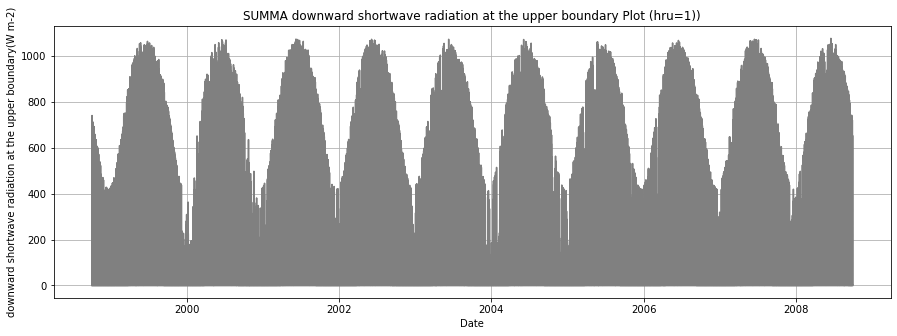

In [19]:
# timeseries plot with Downward shortwave radiation variable and hru 1
P.ts_plot('SWRadAtm', hru_num = 0)

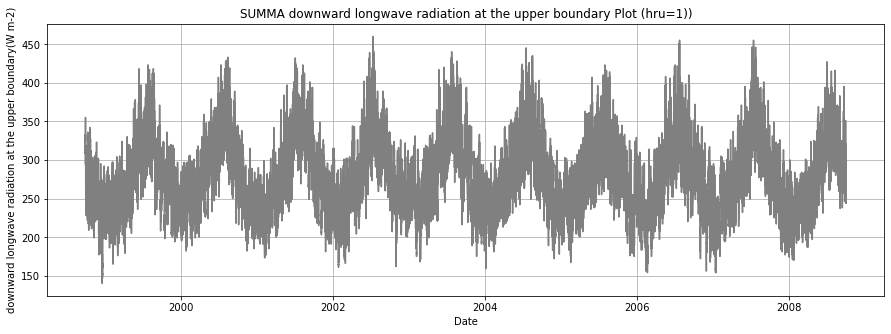

In [20]:
# timeseries plot with Downward longwave radiation variable and hru 1
P.ts_plot('LWRadAtm', hru_num = 0)